In [0]:
def predict_credit_score():
    path=input("Enter path of the file you want to predict: ")
    xtest=spark.read.csv(path,header=True,inferSchema=True)
    from pyspark.ml import PipelineModel
    model_path = "dbfs:/mnt/ADLS_Landing/Model/"
    loaded_rf_model = PipelineModel.load(model_path)
    new_data_predictions = loaded_rf_model.transform(xtest)
    # Select the required columns: 'Customer_ID' and 'prediction'
    result_df = new_data_predictions.select("Customer_ID", "prediction")
    # Save the result as a CSV file to the specified output path
    result_df.coalesce(1).write.mode("overwrite").format("csv").option("header", "true").save("dbfs:/mnt/ADLS_Landing/output")
    # Plot bar chart using display function
    from pyspark.sql.functions import count
    op=result_df.groupBy('prediction').agg(count('*').alias('Count'))
    pandas_df = op.toPandas()
    display(pandas_df.plot(kind='bar', x='prediction', y='Count', title='Result'))

Enter path of the file you want to predict:  dbfs:/mnt/ADLS_Landing/test_data/part-00000-tid-289591972118319462-7a8aa09e-6775-4ad6-a5cb-c50a7a89019f-9879-1-c000.csv

<AxesSubplot:title={'center':'Result'}, xlabel='prediction'>

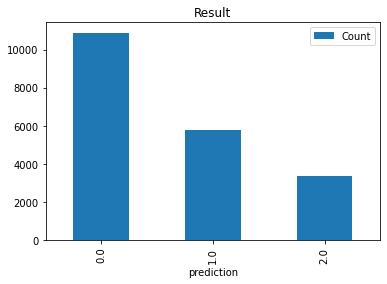

In [0]:
predict_credit_score()

#Standard - 0
#poor - 1
#Good - 2